In [6]:
%matplotlib inline
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from IPython.core.display import clear_output

from imports import *
from functions import *

In [19]:
tram = "4_04"
img = imread("dane/"+tram+".jpg")
img_norm = normalize_size(img)
img_sat = rgb2hsv(img_norm)[:,:,1]

# recognize segments
segmentated = None

In [22]:
@interact(low = (0, 1, 0.1), high =(0.5, 1.1, 0.1))

def on_change(low, high):
    global segmentated
    elevation_map = sobel(img_sat)

    markers = np.zeros_like(img_sat)
    markers[img_sat < low] = 1
    markers[img_sat > high] = 2

    segmentated = watershed(elevation_map, markers)
    segmentated = ndi.binary_fill_holes(segmentated - 1)
    segmentated = segmentated.astype(np.uint8)
    
    show(segmentated)

interactive(children=(FloatSlider(value=0.0, description='low', max=1.0), FloatSlider(value=0.8, description='…

max: 247 
min: 109 
średnia: 178.0 
mediana:  178.0 
std:  69.0 

[1. 0. 0. 0. 0. 0. 0. 0. 0. 1.] [109.  122.8 136.6 150.4 164.2 178.  191.8 205.6 219.4 233.2 247. ]


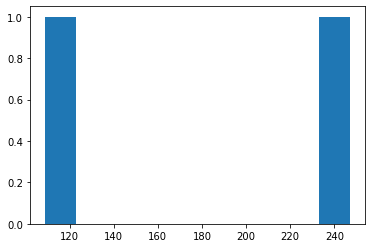

In [8]:
label_objects, nb_labels = ndi.label(segmentated)
sizes = np.bincount(label_objects.ravel())
sizes = sizes[np.logical_and(sizes<1500, sizes>50)]
print("max:", max(sizes), "\nmin:", min(sizes), "\nśrednia:", np.mean(sizes), "\nmediana: ", np.median(sizes), "\nstd: ", np.std(sizes), "\n")
n, bins, patches = plt.hist(sizes) #
print(n, bins)

In [23]:
@interact(SMALL_TRESH=(0,100,10), BIG_TRESH=(100,1000,100), RED_TRESH=(0,255,1), BLUE_TRESH=(0,255,1), GREY_BCKG_LVL = (0.2,0.5, 0.1))

def on_change(SMALL_TRESH, BIG_TRESH, RED_TRESH, BLUE_TRESH, BB_FACTOR_X = 1.5, BB_FACTOR_Y = 1.2, BB_MIN_WIDTH = 4, BB_MIN_HEIGHT = 13, GREY_BCKG_LVL = 0.4):    
    c = {"RED_TRESH": RED_TRESH, "BLUE_TRESH": BLUE_TRESH, "SMALL_TRESH": SMALL_TRESH, "BIG_TRESH": BIG_TRESH, "BB_FACTOR_X": BB_FACTOR_X, "BB_FACTOR_Y": BB_FACTOR_Y, "BB_MIN_WIDTH": BB_MIN_WIDTH, "BB_MIN_HEIGHT": BB_MIN_HEIGHT, "GREY_BCKG_LVL": GREY_BCKG_LVL}
    
    masked = apply_masks(img_norm, segmentated, c["RED_TRESH"], c["BLUE_TRESH"])

    cleaned = discard_small_and_big(masked, c["SMALL_TRESH"], c["BIG_TRESH"])
    cleaned = cleaned.astype(np.uint8)

    cleaned = apply_masks(img_norm, cleaned, c["RED_TRESH"], c["BLUE_TRESH"])

    # recognize edges
    contours, hierarchy = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    img_cont = img_norm.copy()
    cv2.drawContours(img_cont, contours, -1, (255,0,0), 2)

    for cnt in contours:
        try:
            slice = process_slice(cnt, img_cont, img_norm, cleaned, c)
        except SliceDiscardedException as e:
            # print(e.message)
            pass
    show(segmentated, masked, cleaned)

interactive(children=(IntSlider(value=50, description='SMALL_TRESH', step=10), IntSlider(value=500, descriptio…

In [5]:
asgsdhfgj
sdfhg
asd
fgfh

afs
df
sdfg
d
hj
fgh
j
ghj
hgj
hj
ghj
h
jhg
jf
gj
ghj
hg
jh
f
g

NameError: name 'asgsdhfgj' is not defined